# Case 10: Backtesting Investment Strategies (US Stocks)

## Importing the Data

In [1]:
import pandas as pd

In [2]:
pd.read_csv("dji.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3333 non-null   object 
 1   Open       3333 non-null   float64
 2   High       3333 non-null   float64
 3   Low        3333 non-null   float64
 4   Close      3333 non-null   float64
 5   Adj Close  3333 non-null   float64
 6   Volume     3333 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 182.4+ KB


In [3]:
data = pd.read_csv("dji.csv", parse_dates = ["Date"], index_col = "Date")

In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...
2020-03-24,19722.189453,20737.699219,19649.250000,20704.910156,20704.910156,799340000
2020-03-25,21050.339844,22019.929688,20538.339844,21200.550781,21200.550781,796320000
2020-03-26,21468.380859,22595.060547,21427.099609,22552.169922,22552.169922,705180000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3333 entries, 2007-01-03 to 2020-03-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3333 non-null   float64
 1   High       3333 non-null   float64
 2   Low        3333 non-null   float64
 3   Close      3333 non-null   float64
 4   Adj Close  3333 non-null   float64
 5   Volume     3333 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 311.3 KB


In [7]:
df = data.loc["2010-01-01": "2020-03-31", "Close"].to_frame() # after stock market crash to pandemic

In [8]:
df

,Close
Date,
2010-01-04,10583.959961
2010-01-05,10572.019531
2010-01-06,10573.679688
2010-01-07,10606.860352
2010-01-08,10618.190430
...,...
2020-03-24,20704.910156
2020-03-25,21200.550781
2020-03-26,22552.169922


## Data Visualization & Returns

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("seaborn-v0_8")

In [10]:
df.describe()

,Close
count,2577.000000
mean,17820.342520
std,5292.260933
min,9686.480469
25%,13034.490234
50%,17113.150391
75%,21892.429688
max,29551.419922


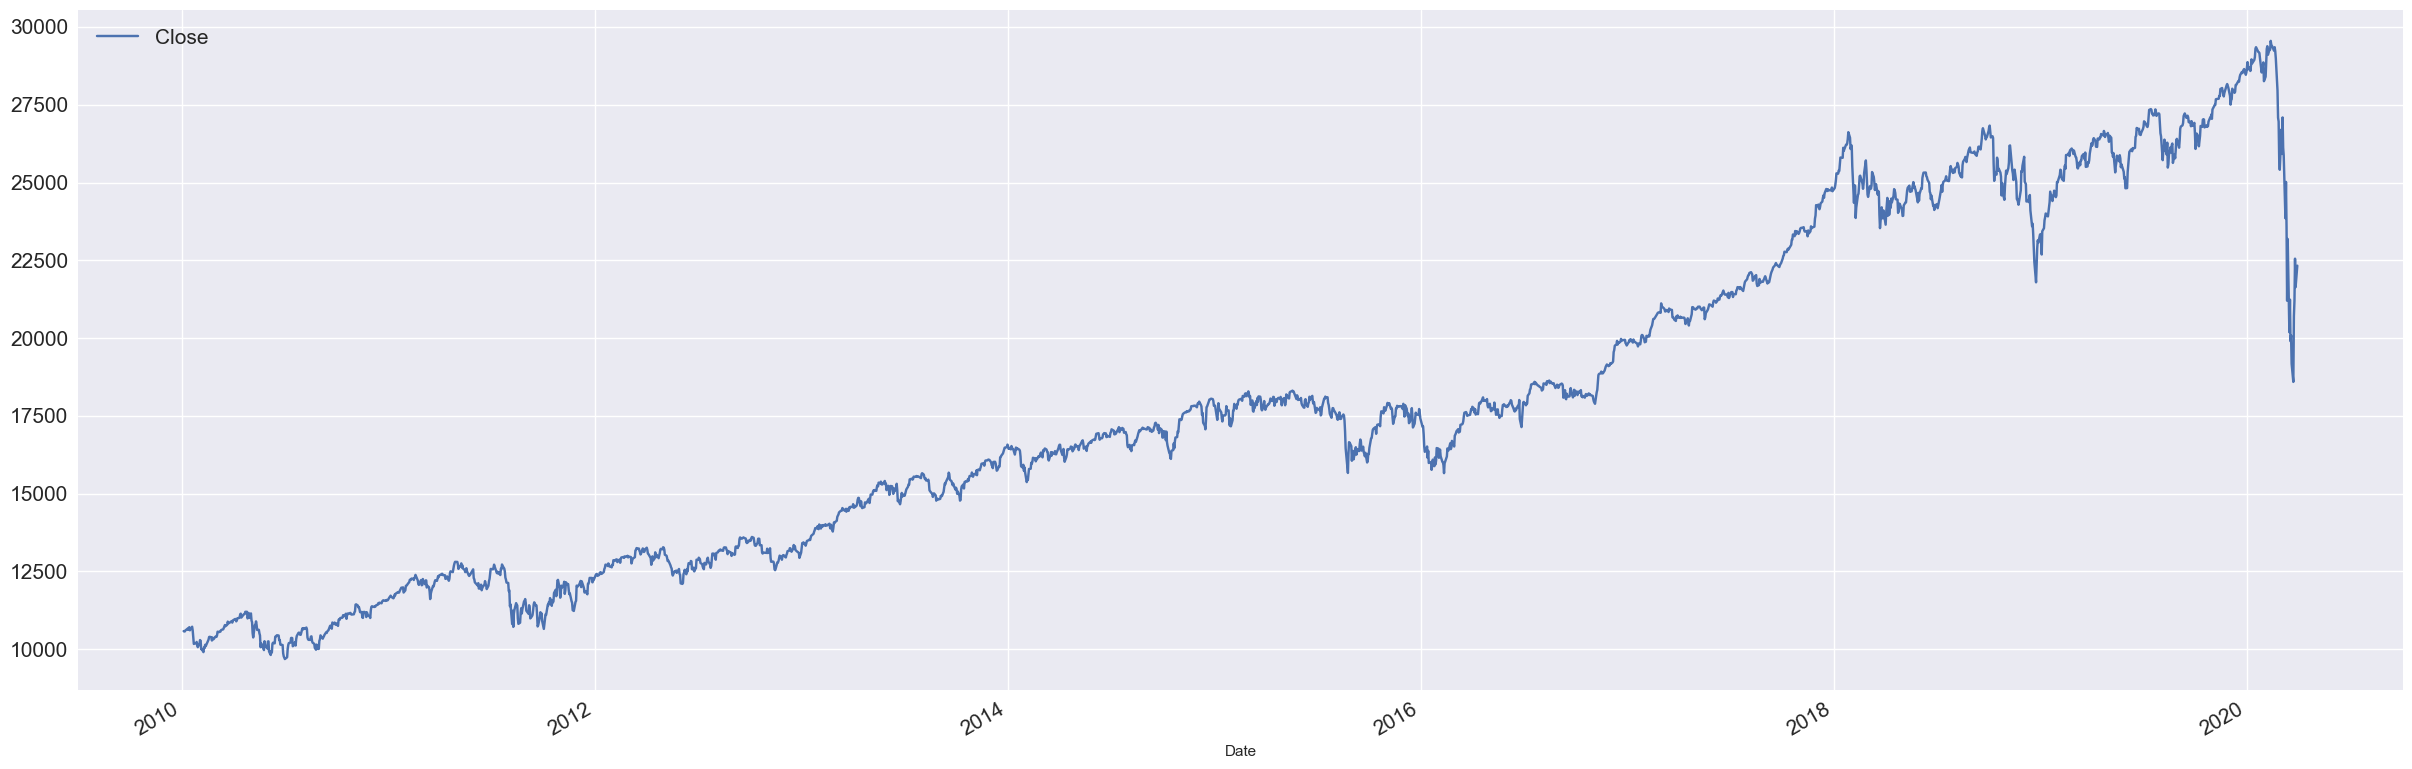

In [13]:
df.plot(figsize = (30, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [14]:
df["Return"] = df.pct_change()

In [15]:
df

,Close,Return
Date,,
2010-01-04,10583.959961,NaN
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


In [16]:
df.dropna(inplace = True)

In [17]:
df

,Close,Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


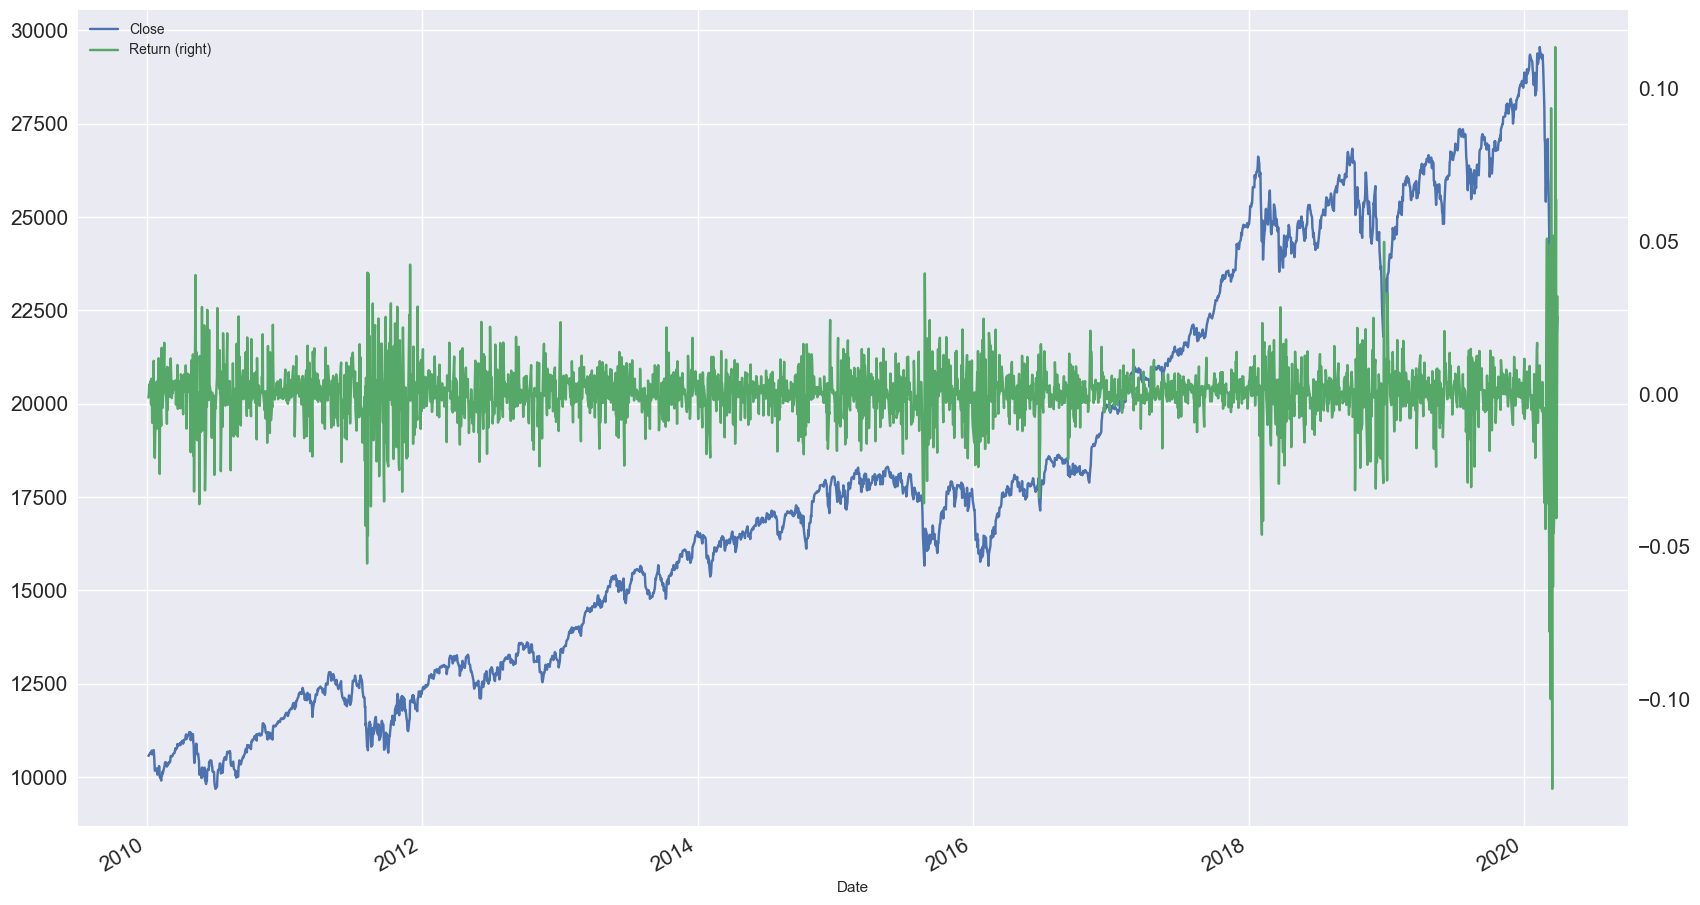

In [18]:
df.plot(figsize = (20, 12), secondary_y = "Return", mark_right = True, fontsize = 15)
plt.show()

In [19]:
df.rename(columns = {"Close":"DJI_Close", "Return":"DJI_Return"}, inplace = True)

In [20]:
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


## Backtesting a simple Momentum Strategy

__Positions__:

+1: Investing in DJI (__long__ position) <br>
-1: Short Selling DJI (__short__ position)<br>
0: No position (__neutral__)

__Strategies__:

-__Buy and Hold__ (Basic Strategy - passive): Initially Investing into DJI and do nothing (Position: +1 on any given day)

-__Simple Momentum__ (active Strategy to be tested): <br>
__a) Investing (+1)__ into DJI tomorrow if today´s return was __positive__ <br>
__b) Short selling (-1)__ DJI tomorrow if today´s return was __negative__

In [21]:
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


In [22]:
df["Position"] = np.sign(df["DJI_Return"])

In [23]:
df

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,-1.0
2010-01-06,10573.679688,0.000157,1.0
2010-01-07,10606.860352,0.003138,1.0
2010-01-08,10618.190430,0.001068,1.0
2010-01-11,10663.990234,0.004313,1.0
...,...,...,...
2020-03-24,20704.910156,0.113650,1.0
2020-03-25,21200.550781,0.023938,1.0
2020-03-26,22552.169922,0.063754,1.0


In [24]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [25]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN
2010-01-06,10573.679688,0.000157,1.0,-0.000157
2010-01-07,10606.860352,0.003138,1.0,0.003138
2010-01-08,10618.190430,0.001068,1.0,0.001068
2010-01-11,10663.990234,0.004313,1.0,0.004313
...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,-0.113650
2020-03-25,21200.550781,0.023938,1.0,0.023938
2020-03-26,22552.169922,0.063754,1.0,0.063754


In [26]:
df.Strategy_Ret.add(1, fill_value = 0).cumprod()

Date
2010-01-05    1.000000
2010-01-06    0.999843
2010-01-07    1.002981
2010-01-08    1.004052
2010-01-11    1.008383
                ...   
2020-03-24    0.472559
2020-03-25    0.483871
2020-03-26    0.514720
2020-03-27    0.493827
2020-03-30    0.478063
Name: Strategy_Ret, Length: 2576, dtype: float64

In [27]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

In [28]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1.0,-0.000157,10570.359375
2010-01-07,10606.860352,0.003138,1.0,0.003138,10603.529620
2010-01-08,10618.190430,0.001068,1.0,0.001068,10614.856140
2010-01-11,10663.990234,0.004313,1.0,0.004313,10660.641563
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,-0.113650,4995.902521
2020-03-25,21200.550781,0.023938,1.0,0.023938,5115.496000
2020-03-26,22552.169922,0.063754,1.0,0.063754,5441.629145


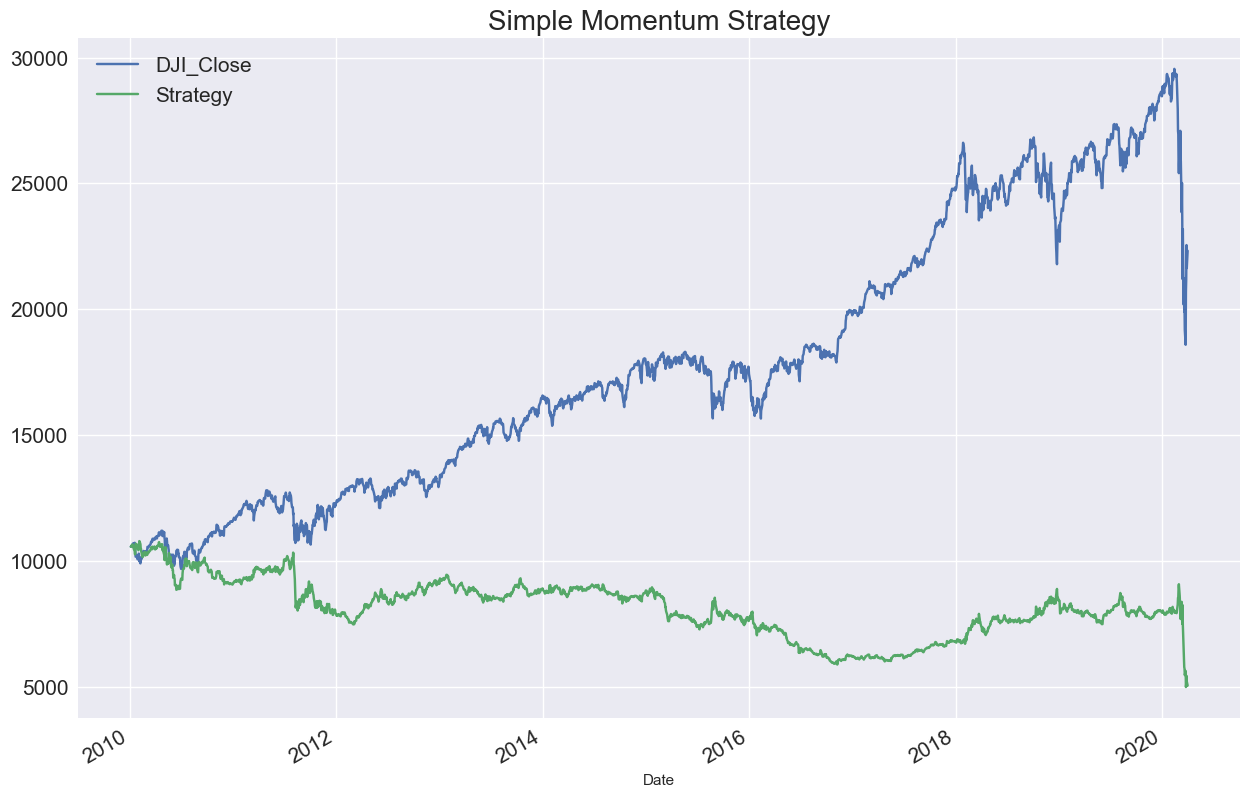

In [29]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.title("Simple Momentum Strategy", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

In [30]:
def summary_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    summary["Return"] = summary["mean"] * 252
    summary["Risk"] = summary["std"] * np.sqrt(252)
    summary.drop(columns = ["mean", "std"], inplace = True)
    return summary

In [31]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.087212,0.167896
Strategy_Ret,-0.057966,0.167946


## Backtesting a simple Contrarian Strategy

__Strategies__:

-__Buy and Hold__ (Basic Strategy): Initially Investing into DJI and do nothing (Position: +1 on all days)

-__Simple Contrarian__ (Strategy to be tested): <br>
__a) Short Selling (-1)__ DJI tomorrow if today´s return was __positive__ <br>
__b) Investing (+1)__ into DJI tomorrow if today´s return was __negative__

In [32]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...
2020-03-24,19722.189453,20737.699219,19649.250000,20704.910156,20704.910156,799340000
2020-03-25,21050.339844,22019.929688,20538.339844,21200.550781,21200.550781,796320000
2020-03-26,21468.380859,22595.060547,21427.099609,22552.169922,22552.169922,705180000


In [33]:
df = data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


In [34]:
df["Position"] = -np.sign(df["DJI_Return"])

In [35]:
df

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,1.0
2010-01-06,10573.679688,0.000157,-1.0
2010-01-07,10606.860352,0.003138,-1.0
2010-01-08,10618.190430,0.001068,-1.0
2010-01-11,10663.990234,0.004313,-1.0
...,...,...,...
2020-03-24,20704.910156,0.113650,-1.0
2020-03-25,21200.550781,0.023938,-1.0
2020-03-26,22552.169922,0.063754,-1.0


In [36]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [37]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,1.0,NaN
2010-01-06,10573.679688,0.000157,-1.0,0.000157
2010-01-07,10606.860352,0.003138,-1.0,-0.003138
2010-01-08,10618.190430,0.001068,-1.0,-0.001068
2010-01-11,10663.990234,0.004313,-1.0,-0.004313
...,...,...,...,...
2020-03-24,20704.910156,0.113650,-1.0,0.113650
2020-03-25,21200.550781,0.023938,-1.0,-0.023938
2020-03-26,22552.169922,0.063754,-1.0,-0.063754


In [38]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

In [39]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,-1.0,0.000157,10573.679688
2010-01-07,10606.860352,0.003138,-1.0,-0.003138,10540.499023
2010-01-08,10618.190430,0.001068,-1.0,-0.001068,10529.239831
2010-01-11,10663.990234,0.004313,-1.0,-0.004313,10483.823700
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,-1.0,0.113650,16885.390373
2020-03-25,21200.550781,0.023938,-1.0,-0.023938,16481.182609
2020-03-26,22552.169922,0.063754,-1.0,-0.063754,15430.441894


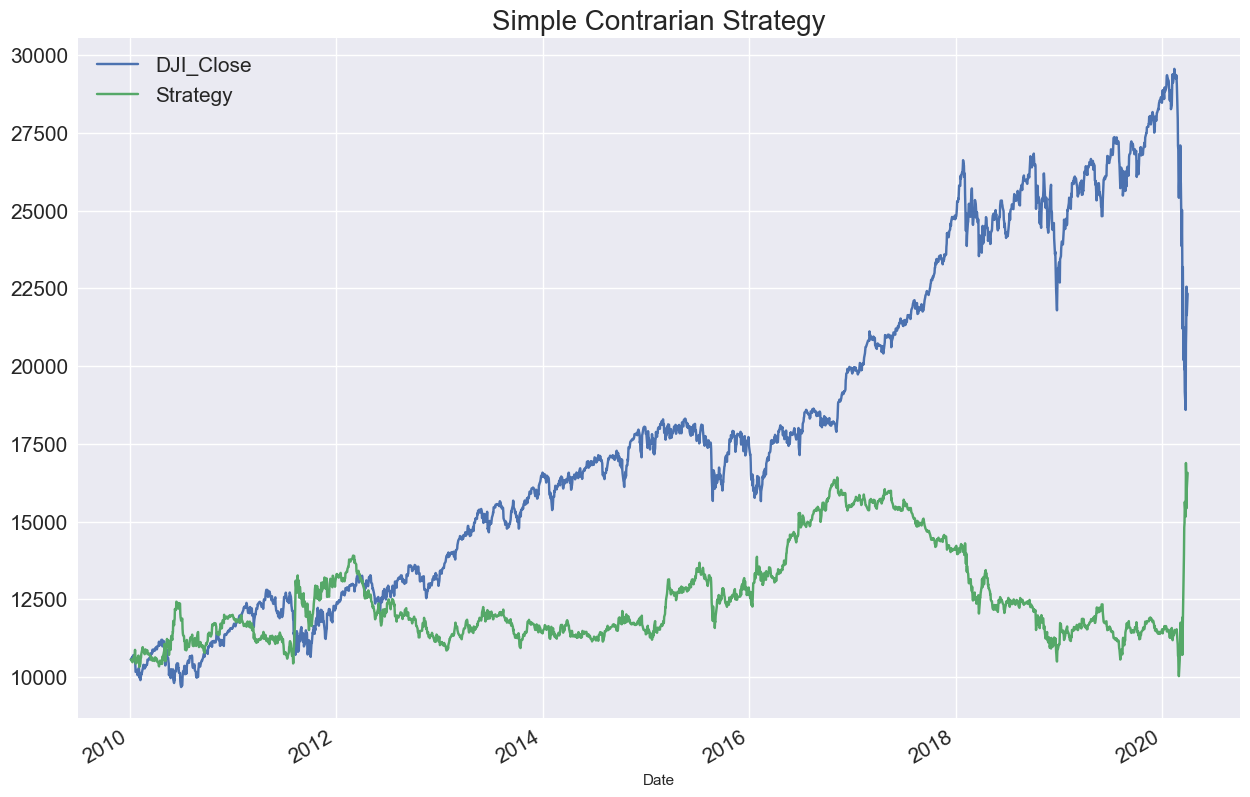

In [40]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Simple Contrarian Strategy", fontsize = 20)
plt.show()

In [41]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.087212,0.167896
Strategy_Ret,0.057966,0.167946


## More complex Strategies & Backtesting vs. Fitting

In [42]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...
2020-03-24,19722.189453,20737.699219,19649.250000,20704.910156,20704.910156,799340000
2020-03-25,21050.339844,22019.929688,20538.339844,21200.550781,21200.550781,796320000
2020-03-26,21468.380859,22595.060547,21427.099609,22552.169922,22552.169922,705180000


In [43]:
df = data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


In [44]:
df["Position"] = np.where(df["DJI_Return"] > 0.01, -1, 1)

In [45]:
df

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,1
2010-01-06,10573.679688,0.000157,1
2010-01-07,10606.860352,0.003138,1
2010-01-08,10618.190430,0.001068,1
2010-01-11,10663.990234,0.004313,1
...,...,...,...
2020-03-24,20704.910156,0.113650,-1
2020-03-25,21200.550781,0.023938,-1
2020-03-26,22552.169922,0.063754,-1


In [46]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [47]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,1,NaN
2010-01-06,10573.679688,0.000157,1,0.000157
2010-01-07,10606.860352,0.003138,1,0.003138
2010-01-08,10618.190430,0.001068,1,0.001068
2010-01-11,10663.990234,0.004313,1,0.004313
...,...,...,...,...
2020-03-24,20704.910156,0.113650,-1,0.113650
2020-03-25,21200.550781,0.023938,-1,-0.023938
2020-03-26,22552.169922,0.063754,-1,-0.063754


In [48]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

In [49]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,1,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1,0.000157,10573.679688
2010-01-07,10606.860352,0.003138,1,0.003138,10606.860352
2010-01-08,10618.190430,0.001068,1,0.001068,10618.190430
2010-01-11,10663.990234,0.004313,1,0.004313,10663.990234
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,-1,0.113650,55396.555359
2020-03-25,21200.550781,0.023938,-1,-0.023938,54070.455264
2020-03-26,22552.169922,0.063754,-1,-0.063754,50623.249433


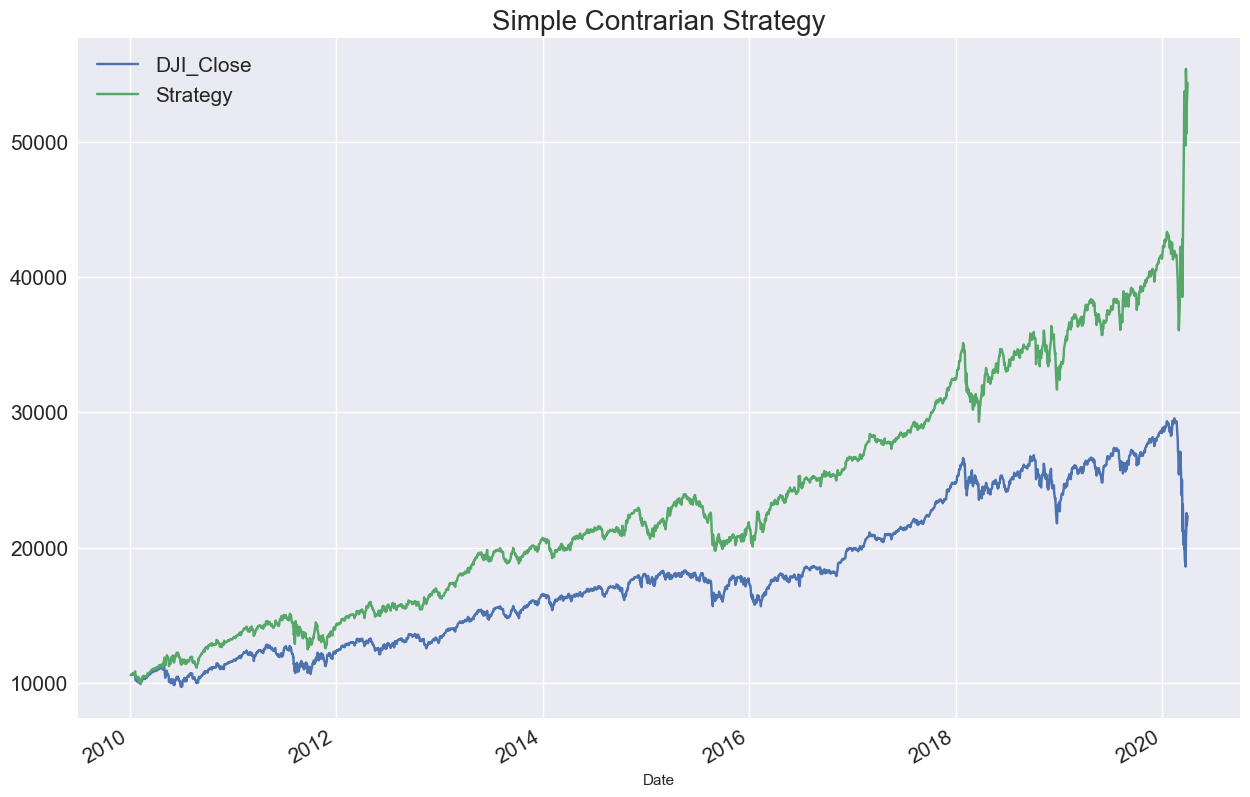

In [50]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Simple Contrarian Strategy", fontsize = 20)
plt.show()

In [51]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.087212,0.167896
Strategy_Ret,0.174262,0.167659


Even if a Strategy __seems to outperform__ the basic Strategy, the following issues need to be considered/analyzed as well: <br>
- Backtesting vs. Fitting -> Was the Strategy __fitted__ and optimized on __historical data__? __Forward Testing__ is required!<br>
- __Transaction Costs__ -> Changing Positions trigger Cost. Include Costs!<br>
- __Tax effects__ -> Changing Positions can trigger (earlier) Tax Payments. Include Taxes!

## Simple Moving Averages (Part 1)

In [ ]:
data

In [ ]:
df = data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)
df

In [ ]:
df.DJI_Close.rolling(window = 50).mean()

In [ ]:
df["SMA50"] = df.DJI_Close.rolling(window = 50).mean()

In [ ]:
df[["DJI_Close", "SMA50"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [ ]:
df["SMA200"] = df.DJI_Close.rolling(window = 200).mean()

In [ ]:
df

In [ ]:
df[["SMA50", "SMA200"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [ ]:
df.dropna(inplace= True)

In [ ]:
df

## Simple Moving Averages (Part 2)

__Strategies__:

-__Buy and Hold__ (Basic Strategy): Initially Investing into DJI and do nothing (Position: +1 on all days)

-__SMA Crossover (Momentum)__ (Strategy to be tested): <br>
__a) Investing (+1)__: SMA50 __>__ SMA200 <br>
__b) Short Selling (-1)__: SMA50 __<__ SMA200

In [ ]:
df["Position"] = np.sign(df.SMA50.sub(df.SMA200)) 

In [ ]:
df

In [ ]:
df[["SMA50", "SMA200", "Position"]].plot(figsize = (15, 10), secondary_y = "Position", fontsize = 15)
plt.show()

In [ ]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [ ]:
df

In [ ]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

In [ ]:
df

In [ ]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("SMA Strategy", fontsize = 20)
plt.show()

In [ ]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

In [ ]:
df["Position"] = -np.sign(df.SMA50.sub(df.SMA200)) 

In [ ]:
df

In [ ]:
df[["SMA50", "SMA200", "Position"]].plot(figsize = (15, 10), secondary_y = "Position", fontsize = 15)
plt.show()

In [ ]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [ ]:
df

In [ ]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

In [ ]:
df

In [ ]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("SMA Strategy", fontsize = 20)
plt.show()

In [ ]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

## Backtesting the Perfect Strategy (...in case you can predict the future...)

In [ ]:
data

In [ ]:
df = data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)
df

In [ ]:
df["Position"] = np.sign(df["DJI_Return"])

In [ ]:
df

In [ ]:
df["Strategy_Ret"] = df["Position"] * df["DJI_Return"]

In [ ]:
df

In [ ]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

In [ ]:
df

In [ ]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15, logy = True)
plt.legend(fontsize = 15)
plt.title("The Perfect Strategy", fontsize = 20)
plt.show()

In [ ]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])